## Introduction

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   

### Data Set Characteristics:

Number of Observations : 506<br></br>
Number of Features : 
* 13 (numeric/categorical) independent features.
* 1 (target) dependent feature.

Features Information :

* CRIM   :  per capita crime rate by town
* ZN     :  proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS  :  proportion of non-retail business acres per town
* CHAS   :  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX    :  nitric oxides concentration (parts per 10 million)
* RM     :  average number of rooms per dwelling
* AGE    :  proportion of owner-occupied units built prior to 1940
* DIS    :  weighted distances to five Boston employment centres
* RAD    :  index of accessibility to radial highways
* TAX    :  full-value property-tax rate per 10,000(dollars).
* PTRATIO:  pupil-teacher ratio by town
* B      :  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT  :  % lower status of the population
* MEDV   :  Median value of owner-occupied homes in 1000's(dollars).


## Code for Analysing the Data

In [292]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

## Display all the columns in a dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
# import warning library
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Reading the csv file (delimiter=r"\s+")
house = pd.read_csv(r'housing.csv',header=None,delim_whitespace=False,delimiter=r"\s+",names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [5]:
house.head() #first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
house.tail() #last 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


### Dimensions of the dataframe

In [7]:
house.shape # finding shape of dataset

(506, 14)

In this dataset there are 506 Obervations and 14 features

### Basic Exploration of data

In [8]:
house.info() # information about all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
house.describe() # statistical summary of the dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Dealing with missing values

In [43]:
# counting null values in each feature
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [44]:
house.head() #first 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


By the above result, As we can see there are lot of zero's in 'ZN' and 'CHAS'. So we can replace 0's with np.nan.

In [45]:
house['ZN'].replace({0:np.nan},inplace=True) # replacing 0's with nan in 'ZN' feature
house['CHAS'].replace({0:np.nan},inplace=True) # replacing 0's with nan in 'CHAS' feature

In [46]:
house.head() #first 5 rows after replacing 0's with nan

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [47]:
house.isna().sum() # counting null values in each feature

CRIM         0
ZN         372
INDUS        0
CHAS       471
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
dtype: int64

In [48]:
# percentage of missing values in each feature
house.isna().mean() * 100

CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
MEDV        0.000000
dtype: float64

By the above result, Both 'ZN' and 'CHAS' has more than 70% of missing values. So we can remove both the features

In [49]:
# Removing the features
house = house.drop(['ZN','CHAS'],axis=1)

In [50]:
house.info() # information about all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   NOX      506 non-null    float64
 3   RM       506 non-null    float64
 4   AGE      506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    int64  
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.6 KB


### Correlation of features

In [ ]:
house_corr = house.corr()

<AxesSubplot:>

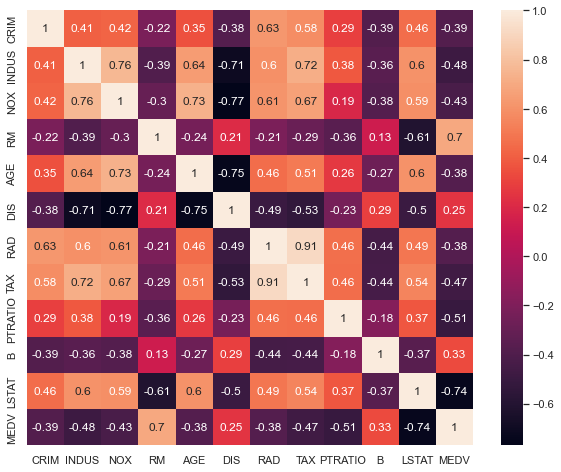

In [143]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(house_corr,annot=True)

By looking at the correlation matrix we can see that 'RM' has a strong positive correlation with 'MEDV'(0.7) whereas 'LSTAT' has a high negative correlation with 'MEDV'(-0.74).

### Dealing with Outliers with IQR

Text(0.5, 1.0, 'MEDV')

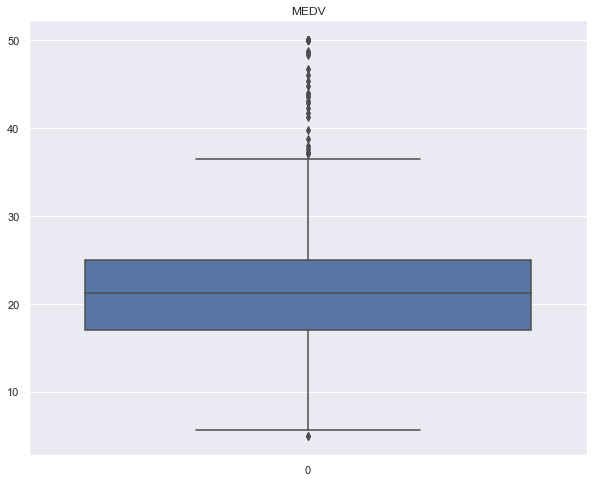

In [144]:
sns.set_style("darkgrid") #setting background 'darkgrid'
sns.boxplot(data = house['MEDV']).set_title('MEDV') #creating the boxplot

**Observation :**<br>
    There are outliers in MEDV features.

In [133]:
#calculating 25% and 75% of the data
q1 = house['MEDV'].quantile(0.25)
q3 = house['MEDV'].quantile(0.75)
q1,q3  #printing q1 and q2

(17.025, 25.0)

In [134]:
# Calculating IQR
IQR = q3-q1
IQR

7.975000000000001

### Removing the outliers

In [135]:
lower_limit = q1 - 1.5*IQR # calculating the lower limit
upper_limit = q3 + 1.5*IQR # calculating the upper limit
lower_limit,upper_limit

(5.0624999999999964, 36.962500000000006)

In [136]:
# Removal of outliers
house_2 = house[(house['MEDV']>lower_limit) & (house['MEDV']<upper_limit)]

In [123]:
house_2.shape #shape of dataframe after removing the outliers

(466, 12)

Text(0.5, 1.0, 'MEDV')

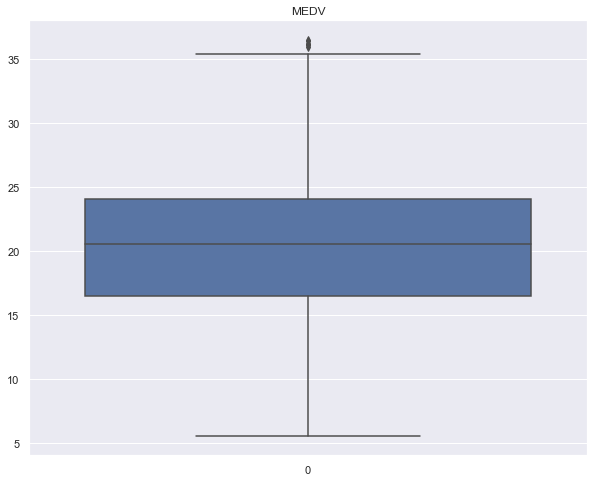

In [145]:
sns.boxplot(data = house_2['MEDV']).set_title('MEDV') # boxplot

In [146]:
house_2['MEDV'].skew() # skewness of 'MEDV' feature

0.20256283436312952

Text(0.5, 1.0, 'LSTAT')

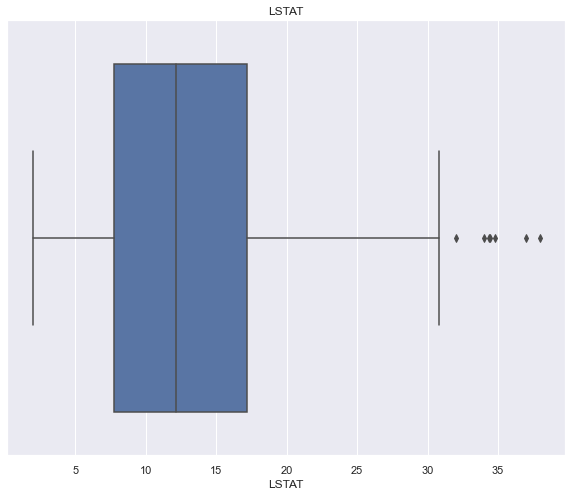

In [148]:
# boxplot of 'LSTAT' feature
sns.boxplot(house_2['LSTAT']).set_title('LSTAT') 

**Observation :** <br>
There are outliers in 'LSTAT' feature.

In [152]:
#calculating 25% and 75% of the data
q1 = house_2['LSTAT'].quantile(0.25)
q3 = house_2['LSTAT'].quantile(0.75)
q1,q3  #printing q1 and q2

(7.79, 17.205000000000002)

In [153]:
# Calculating IQR
IQR = q3 - q1
IQR

9.415000000000003

In [154]:
lower_limit = q1 - 1.5*IQR # calculating the lower limit
upper_limit = q3 + 1.5*IQR # calculating the upper limit
lower_limit,upper_limit

(-6.332500000000004, 31.327500000000008)

In [155]:
# Removal of outliers
house_3 = house_2[(house_2['LSTAT']>lower_limit) & (house_2['LSTAT']<upper_limit)]

Text(0.5, 1.0, 'LSTAT')

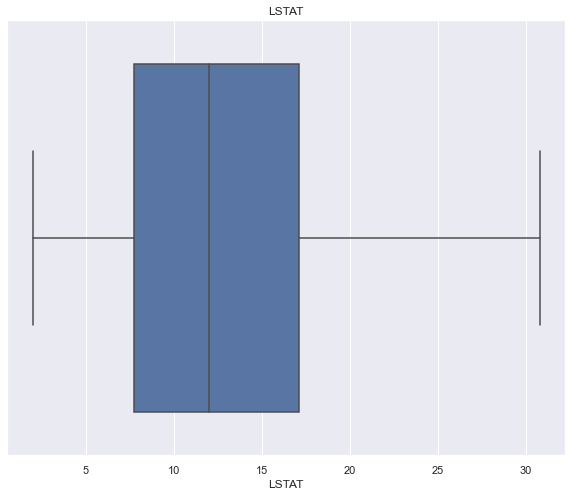

In [156]:
sns.boxplot(house_3['LSTAT']).set_title('LSTAT') # boxplot of 'LSTAT' feature

All Outliers in 'LSTAT' feature are removed.

In [163]:
house_3.shape #shape of dataframe after removal of outliers

(459, 12)

## Distribution of data in feature

### Distribution continous features

In [160]:
# continous_features = house_3.select_dtypes(include='float64')
continous_features = [feature for feature in house_3.columns if house_3[feature].dtype == 'float64']
continous_features  #captured continous features

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

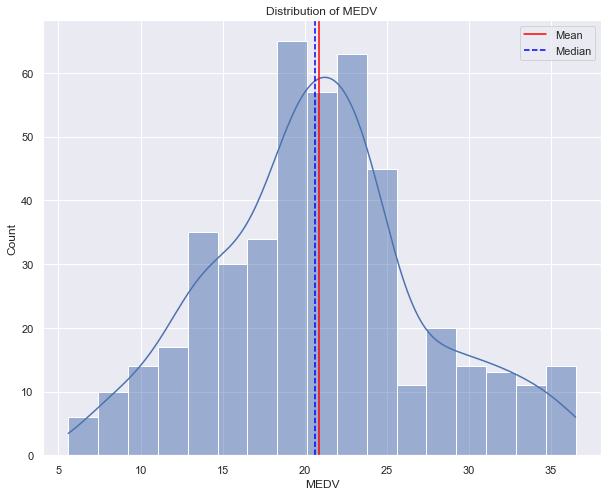

In [177]:
# distribution of dependent feature
sns.histplot(house_3['MEDV'],kde=True).set_title("Distribution of MEDV") # hist plot
plt.axvline(x=house_3['MEDV'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['MEDV'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend() 
plt.show()

By the above figure, the "MEDV" feature is normally distributed and mean and median are all most same.

<AxesSubplot:xlabel='INDUS', ylabel='Count'>

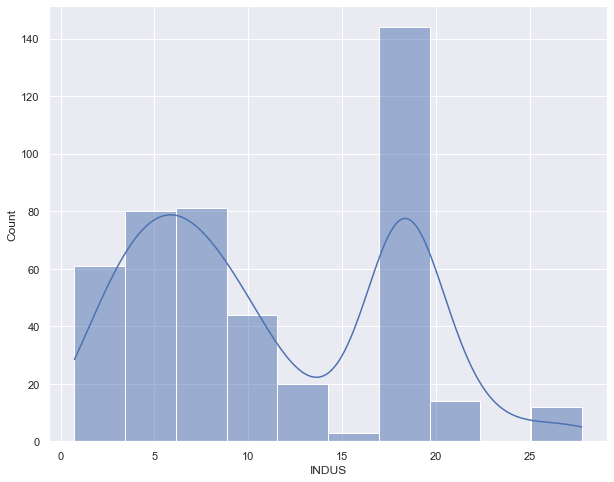

In [178]:
# distribution of INDUS feature
sns.histplot(house_3['INDUS'],kde=True) # hist plot

In [180]:
# importing the boxcox
from scipy.stats import boxcox

In [182]:
house_3.insert(len(house_3.columns),'INDUS_boxcox',boxcox(house_3.iloc[:,1])[0]) #inserting new column of INDUS boxcox

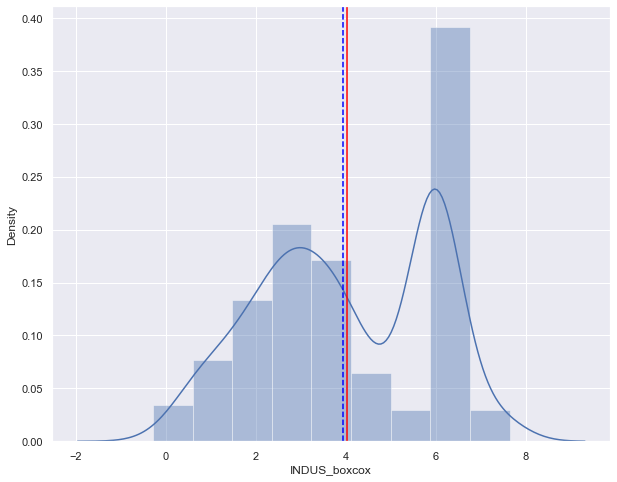

In [184]:
sns.distplot(house_3['INDUS_boxcox']) # distplot
plt.axvline(x=house_3['INDUS_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['INDUS_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 

In [187]:
house_3['INDUS_boxcox'].skew() # skewness of INDUS_boxcox

-0.13025663037156973

By the above figure, the "INDUS_Boxcox'" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

<AxesSubplot:xlabel='NOX', ylabel='Count'>

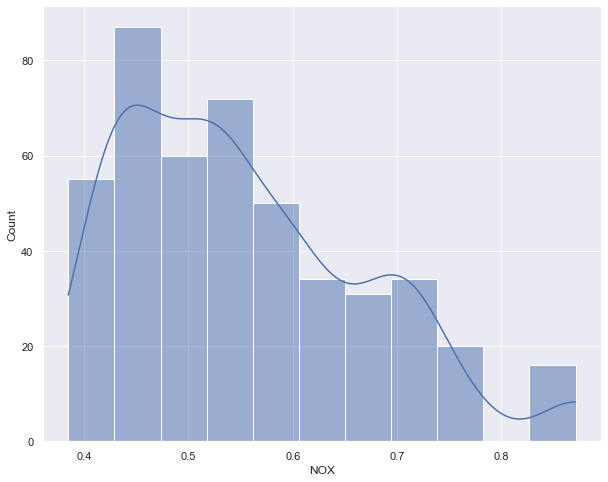

In [188]:
# distribution of NOX feature
sns.histplot(house_3['NOX'],kde=True) # hist plot

In [189]:
house_3.insert(len(house_3.columns),'NOX_boxcox',boxcox(house_3.iloc[:,2])[0]) #inserting new column of NOX boxcox

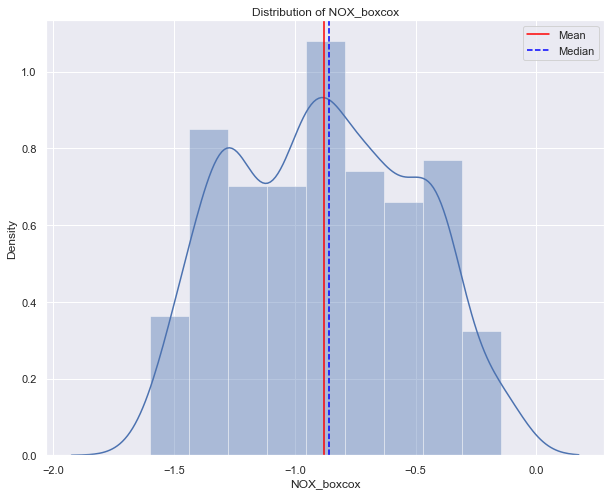

In [192]:
sns.distplot(house_3['NOX_boxcox']).set_title('Distribution of NOX_boxcox') # distplot
plt.axvline(x=house_3['NOX_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['NOX_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [196]:
house_3['NOX_boxcox'].skew() # skewness of NOX_boxcox

0.06685613864749683

By the above figure, the "NOX_boxcox" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

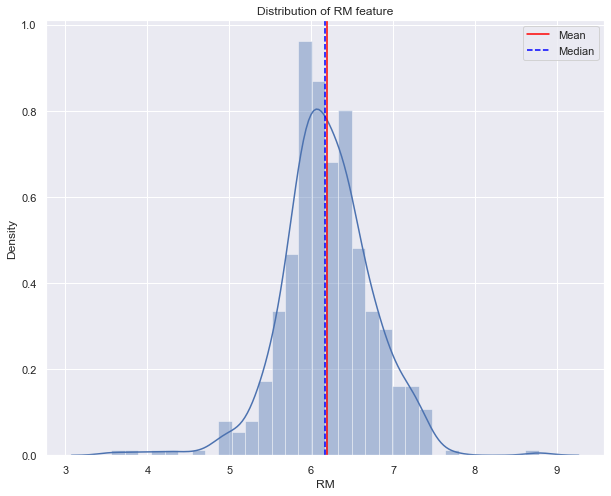

In [199]:
# distribution of RM feature
sns.distplot(house_3['RM']).set_title("Distribution of RM feature")
plt.axvline(x=house_3['RM'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['RM'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [200]:
house_3['RM'].skew()

-0.24030421304963395

By the above figure, the "RM" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

Text(0.5, 1.0, 'Distribution of Age feature')

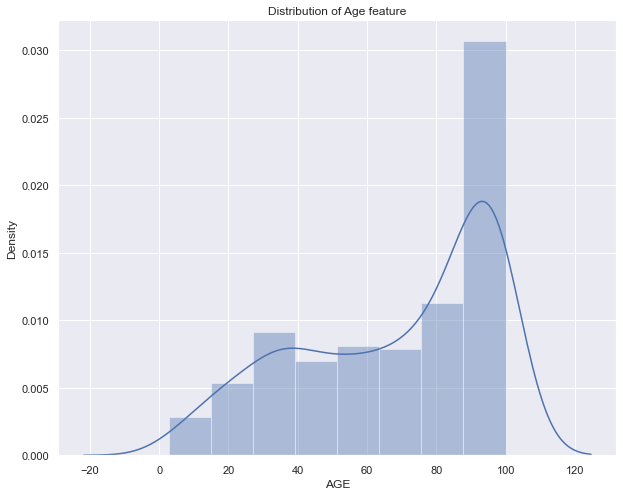

In [203]:
# Distribution of Age feature
sns.distplot(house_3['AGE']).set_title("Distribution of Age feature")

In [204]:
house_3.insert(len(house_3.columns),'AGE_boxcox',boxcox(house_3.iloc[:,4])[0]) #inserting new column of AGE boxcox

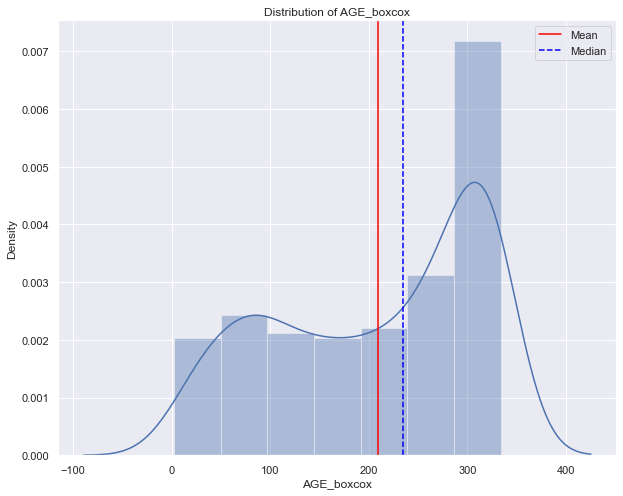

In [205]:
sns.distplot(house_3['AGE_boxcox']).set_title('Distribution of AGE_boxcox') # distplot
plt.axvline(x=house_3['AGE_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['AGE_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [208]:
house_3['AGE_boxcox'].skew() # skewness of AGE_boxcox

-0.4150230110338641

By the above figure, The 'AGE_boxcox' feature is moderatly skewed. So, it can be safe for further step

<AxesSubplot:xlabel='DIS', ylabel='Density'>

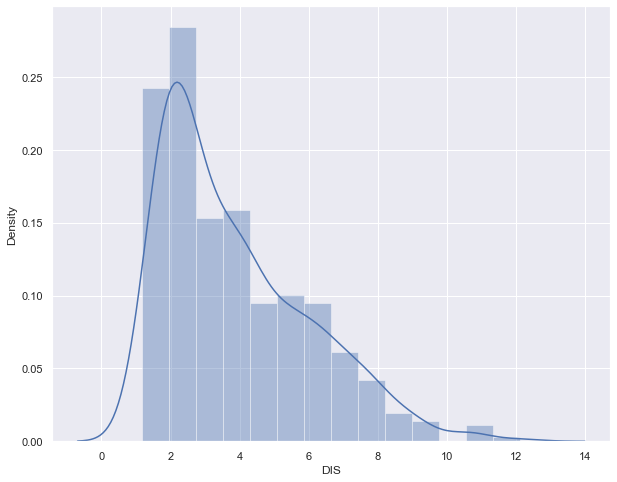

In [209]:
#Distribution of DIS feature
sns.distplot(house_3['DIS'])

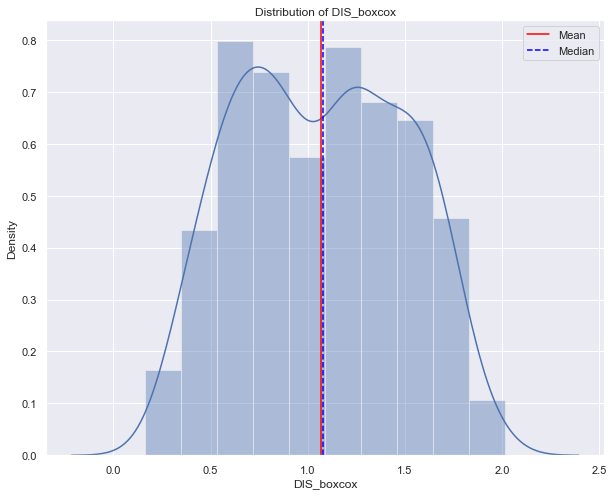

In [232]:
house_3.insert(len(house_3.columns),'DIS_boxcox',boxcox(house_3.iloc[:,5])[0]) #inserting new column of DIS boxcox
sns.distplot(house_3['DIS_boxcox']).set_title('Distribution of DIS_boxcox') # distplot
plt.axvline(x=house_3['DIS_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['DIS_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [233]:
house_3['DIS_boxcox'].skew() # skewness of DIS_boxcox

0.033580500312044376

By the above figure, the "DIS_boxcox" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

<AxesSubplot:xlabel='TAX', ylabel='Density'>

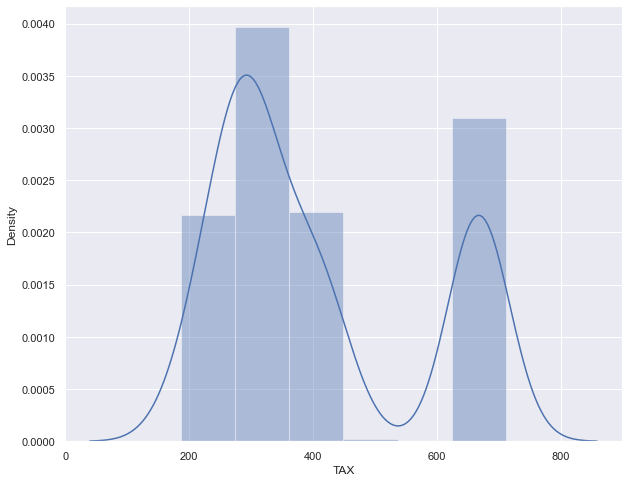

In [213]:
# distribution of TAX feature
sns.distplot(house_3['TAX'])

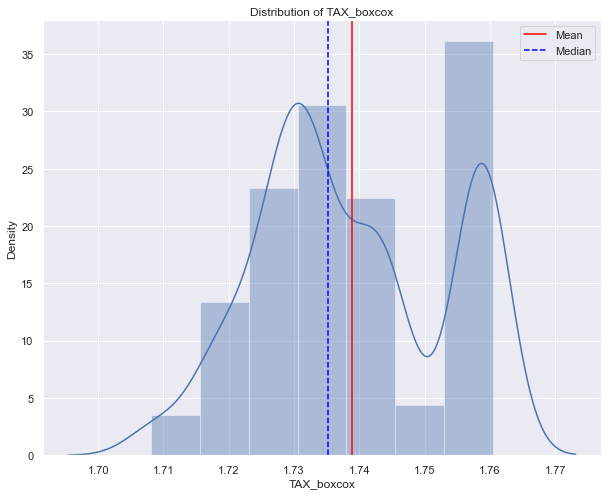

In [235]:
house_3.insert(len(house_3.columns),'TAX_boxcox',boxcox(house_3.iloc[:,7])[0]) #inserting new column of TAX boxcox
sns.distplot(house_3['TAX_boxcox']).set_title('Distribution of TAX_boxcox') # distplot
plt.axvline(x=house_3['TAX_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['TAX_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [236]:
house_3['TAX_boxcox'].skew()

0.08147089333446074

By the above figure, the "TAX_boxcox" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

<AxesSubplot:xlabel='PTRATIO', ylabel='Density'>

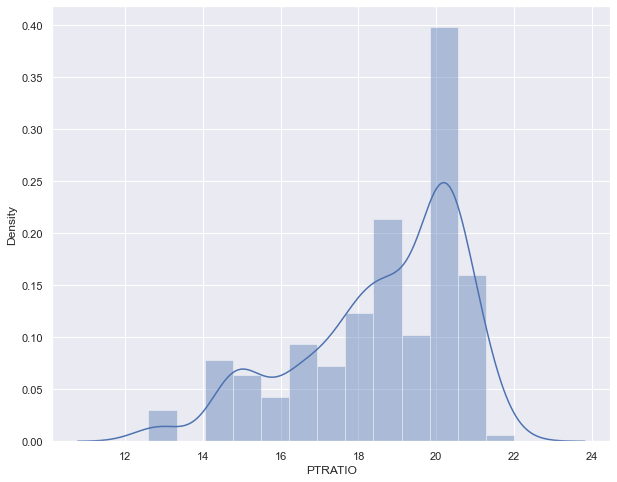

In [216]:
# distribution of PTRATIO feature
sns.distplot(house_3['PTRATIO'])

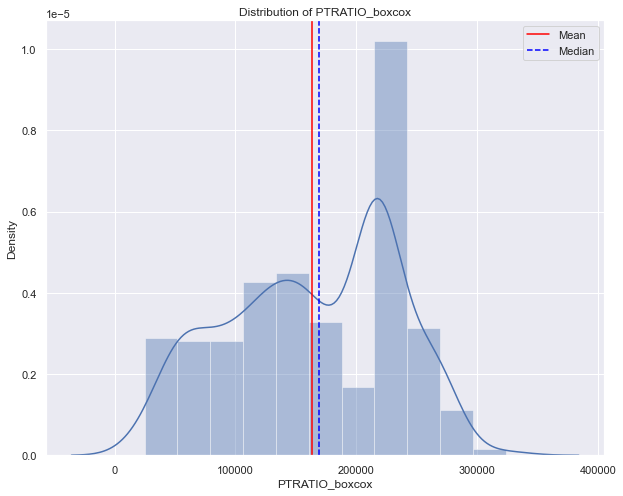

In [238]:
house_3.insert(len(house_3.columns),'PTRATIO_boxcox',boxcox(house_3.iloc[:,8])[0]) #inserting new column of PTRATIO boxcox
sns.distplot(house_3['PTRATIO_boxcox']).set_title('Distribution of PTRATIO_boxcox') # distplot
plt.axvline(x=house_3['PTRATIO_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['PTRATIO_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [239]:
house_3['PTRATIO_boxcox'].skew()

-0.2153653240894605

By the above figure, the "PTRATIO_boxcox" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

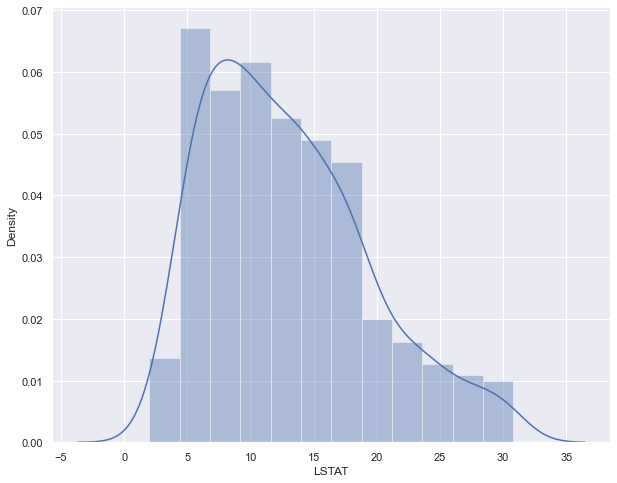

In [244]:
# distribution LSTAT feature
sns.distplot(house_3['LSTAT'])

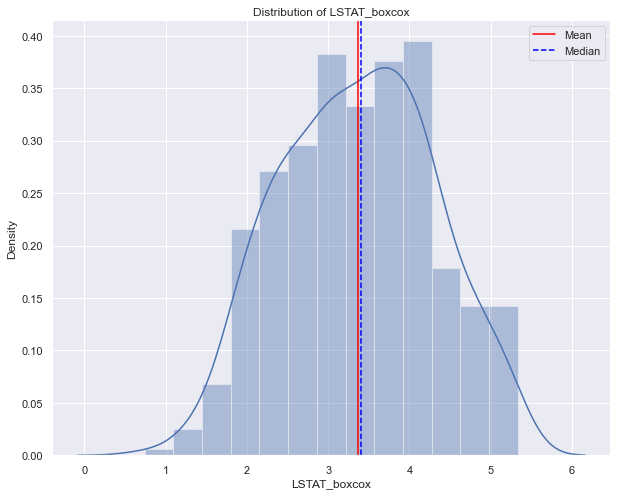

In [248]:
house_3.insert(len(house_3.columns),'LSTAT_boxcox',boxcox(house_3.iloc[:,10])[0]) #inserting new column of LSTAT boxcox
sns.distplot(house_3['LSTAT_boxcox']).set_title('Distribution of LSTAT_boxcox') # distplot
plt.axvline(x=house_3['LSTAT_boxcox'].mean(),color='red',label='Mean') # Plotting mean value 
plt.axvline(x=house_3['LSTAT_boxcox'].median(),color='blue',ls='--',label='Median') # Plotting median value 
plt.legend()
plt.show()

In [250]:
house_3['LSTAT_boxcox'].skew() #skewness of LSTAT_boxcox feature

-0.027870401558314398

By the above figure, the "LSTAT_boxcox" feature is normally distributed and mean and median are all most same. The skewness also between 0.5 and -0.5.

### Distribution of Categorical features

In [262]:
# converting the data type of RAD feature
house_3 = house_3.astype({'RAD' :'object'}) 

In [263]:
house_3['RAD'].dtypes #data type of RAD feature

dtype('O')

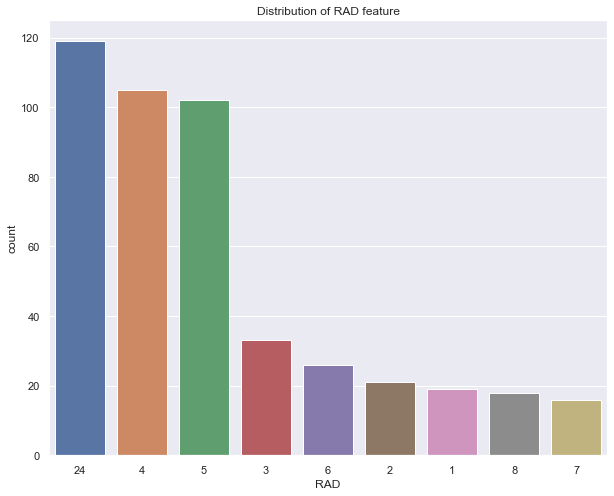

In [277]:
#distribution of RAD feature
sns.countplot(x=house_3['RAD'],order=house_3['RAD'].value_counts().index).set_title("Distribution of RAD feature") #count plot
plt.show()

### Bivariate analysis

In [278]:
house_3.columns #columns in data frame

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV', 'INDUS_boxcox', 'NOX_boxcox', 'AGE_boxcox',
       'DIS_boxcox', 'TAX_boxcox', 'PTRATIO_boxcox', 'B_boxcox',
       'LSTAT_boxcox'],
      dtype='object')

Text(0.5, 1.0, 'Relationship between CRIM and MEDV')

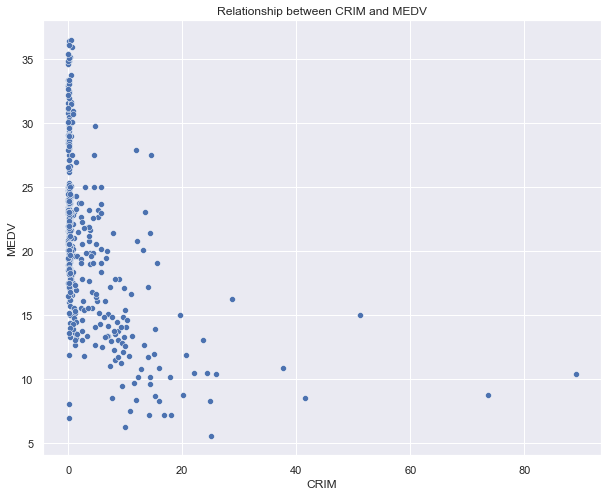

In [280]:
# relationship between CRIM and MEDV
sns.scatterplot(x='CRIM',y='MEDV',data=house_3).set_title('Relationship between CRIM and MEDV')

By the above result, CRIM is not affecting the MEDV.

Text(0.5, 1.0, 'Relationship between RM and MEDV')

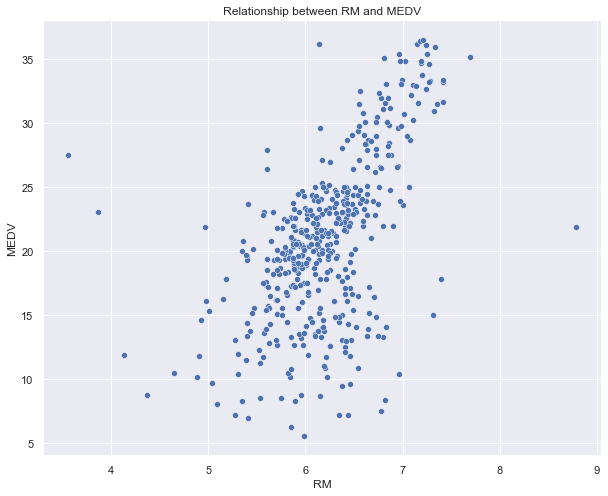

In [281]:
# relationship between RM and MEDV
sns.scatterplot(x='RM',y='MEDV',data=house_3).set_title('Relationship between RM and MEDV')

By the above result, RM is positively affecting the MEDV.

Text(0.5, 1.0, 'Relationship between LSTAT_boxcox and MEDV')

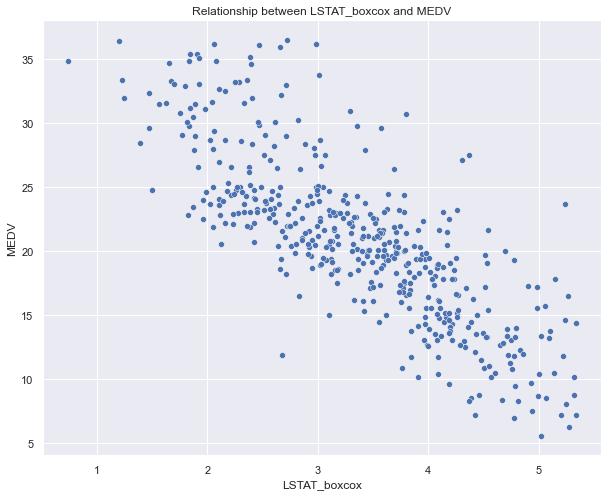

In [282]:
# relationship between LSTAT_boxcox and MEDV
sns.scatterplot(x='LSTAT_boxcox',y='MEDV',data=house_3).set_title('Relationship between LSTAT_boxcox and MEDV')

By the above result, RM is Negatively affecting the MEDV.

In [283]:
house_3.columns #columns in data frame

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV', 'INDUS_boxcox', 'NOX_boxcox', 'AGE_boxcox',
       'DIS_boxcox', 'TAX_boxcox', 'PTRATIO_boxcox', 'B_boxcox',
       'LSTAT_boxcox'],
      dtype='object')

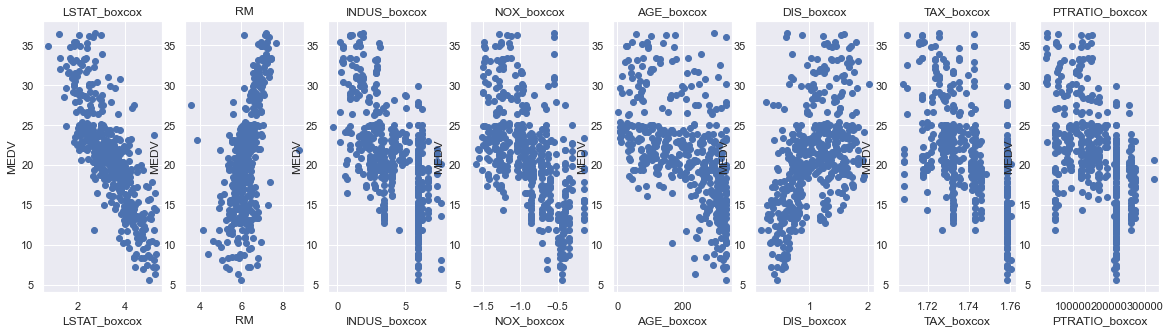

In [287]:
plt.figure(figsize=(20, 5)) #setting size

features = ['LSTAT_boxcox', 'RM','INDUS_boxcox','NOX_boxcox','AGE_boxcox','DIS_boxcox','TAX_boxcox','PTRATIO_boxcox']
target = house_3['MEDV'] #target variable

for i, col in enumerate(features): # iterating through the features
    plt.subplot(1, len(features) , i+1) # subplots for different plots
    x = house_3[col] # independent features into x
    y = target # dependent feature into y
    plt.scatter(x, y, marker='o') #scatter plot 
    plt.title(col) # feature title
    plt.xlabel(col)
    plt.ylabel('MEDV')

Clearly, Only ***LSTAT_boxcox and RM*** features are affecting the MEDV feature.

Text(0.5, 1.0, 'Relationship between RAD and MEDV')

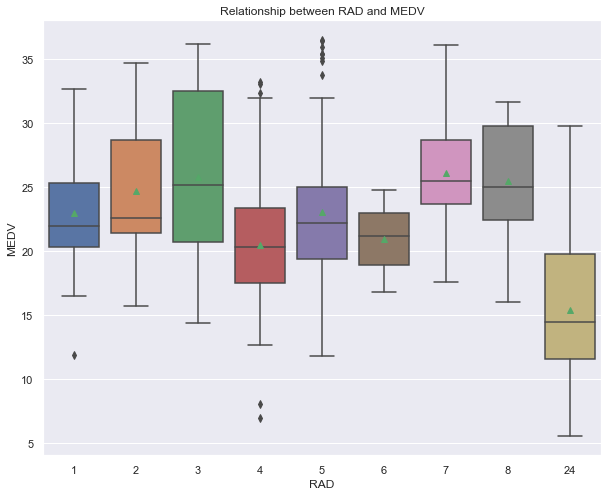

In [291]:
# relationship between RAD and MEDV
sns.boxplot(x='RAD',y='MEDV',data=house_3,showmeans=True).set_title('Relationship between RAD and MEDV')